In [1]:
import sys
sys.path.insert(0, '/home/jw1624/H1-merian/util/')
from util import util

import pynbody
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

import scipy.integrate as integrate

In [ ]:
# testing our integration 

In [2]:
# flux density
def getFluxDensity(hi, dv, D):
    S21 = []
    for m in hi:
        s = (1/(2.36e5)) * (m/(1)) * (1/dv)*((1/D)**2)
        S21.append(s)
    return np.array(S21)

In [32]:
rmax = 15
def rot(r): return 70
def nrot(r): return -1*rot(r)
def sigma(r): return 1/(r+0.4)
def vdisp(r): return 5

def M(v):
        def integrand(vbar, r):
            a = np.exp(- ((v-vbar)**2)/(2*vdisp(r)**2))
            b = r*vdisp(r)
            c = vdisp(r)*np.sqrt( rot(r)**2 -vbar**2 )

            return (a*b)/c

        i2 = integrate.dblquad(integrand, -0,15, -70,70)[0]

        return np.sqrt(2/np.pi)*i2

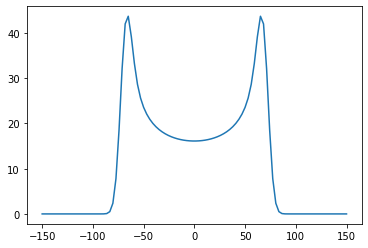

In [33]:
predM = []
vs = np.linspace(-150,150, 100)
for v in vs:
    predM.append(M(v))

plt.plot(vs, predM)
    